In [7]:
import numpy as np
from numpy import linalg

y = np.linspace(-2,2,401) # spatial coordinate
Ny = np.size(y)

amp1 = 1
y01 = 0.5
sigmay1 = 0.6

amp2 = 1.2
y02 = -0.3
sigmay2 = 0.3

dt = 0.2
Nt = 101
tend = dt*(Nt-1)
t = np.linspace(0,tend,Nt) # time

omega1 = 1.2
omega2 = 5.3

v1 = amp1*np.exp(-((y-y01)**2)/(2*sigmay1**2))
v2 = amp2*np.exp(-((y-y02)**2)/(2*sigmay2**2))

X = np.zeros([Ny,Nt])
for tt in range(Nt):
    X[:,tt] = v1*np.cos(omega1*t[tt])+v2*np.cos(omega2*t[tt])

In [8]:
X

array([[ 1.69984421e-04,  1.65050691e-04,  1.50595326e-04, ...,
        -7.24753840e-06,  3.33833190e-05,  7.21373313e-05],
       [ 1.82200428e-04,  1.76903790e-04,  1.61393561e-04, ...,
        -7.78458296e-06,  3.57738579e-05,  7.73260492e-05],
       [ 1.95242290e-04,  1.89556526e-04,  1.72916887e-04, ...,
        -8.36120265e-06,  3.83242785e-05,  8.28664622e-05],
       ...,
       [ 4.77287078e-02,  4.63607063e-02,  4.23351215e-02, ...,
        -2.00138898e-03,  9.39123527e-03,  2.02455159e-02],
       [ 4.57999526e-02,  4.44872332e-02,  4.06243254e-02, ...,
        -1.92051126e-03,  9.01172797e-03,  1.94273784e-02],
       [ 4.39369336e-02,  4.26776121e-02,  3.89718370e-02, ...,
        -1.84239002e-03,  8.64515509e-03,  1.86371249e-02]])

In [9]:
from numpy import linalg
import matplotlib.pyplot as plt

In [11]:
frobenius_norm = linalg.norm(X, 'fro')
print(f"Frobenius norm of this matrix is {frobenius_norm}")

Frobenius norm of this matrix is 95.97363618638974


In [12]:
vector_X = X.flatten()
vector_norm = linalg.norm(vector_X)
print(f"Standard norm of this vector is {vector_norm}")

Standard norm of this vector is 95.97363618638974


Verified that both are the same

In [16]:
differences = linalg.norm(X - X[:, [0]], axis=0)
differences[0] = np.inf
min_index = np.argmin(differences) + 1
min_index

54

In [17]:
inner_products = X.T @ X[:, 0]
inner_products[0] = -np.inf
max_inner_index = np.argmax(inner_products) + 1 
max_inner_index

54

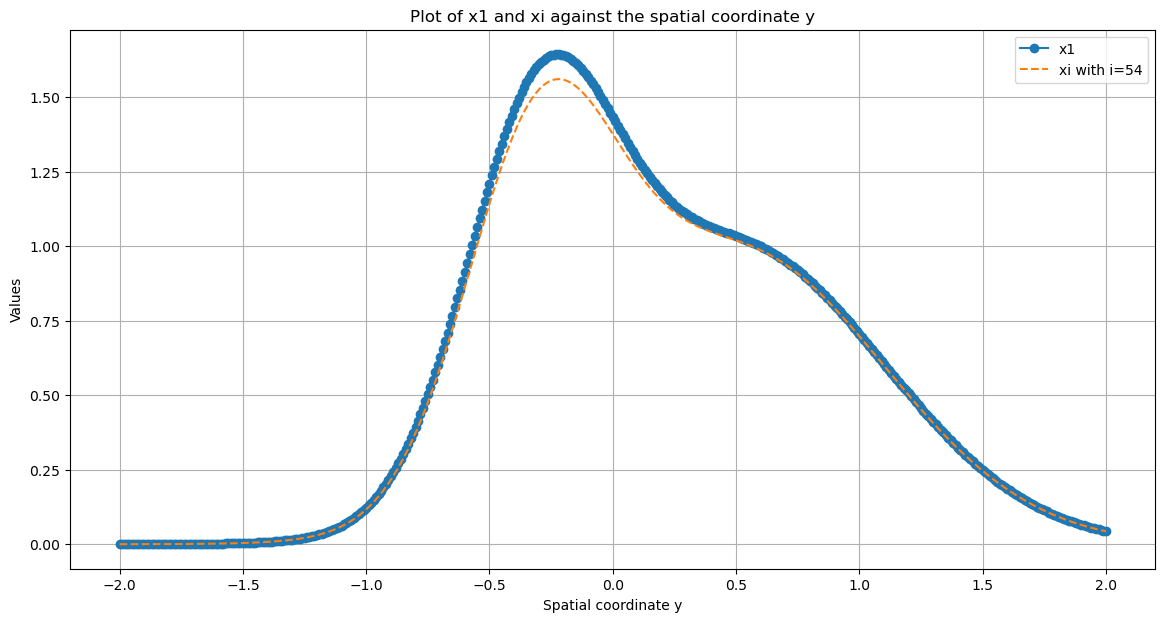

In [20]:
x1 = X[:, 0]
xi_max_inner = X[:, max_inner_index - 1] # Subtracting 1 to get correct index

plt.figure(figsize=(14, 7))
plt.plot(y, x1, label='x1', marker='o')
plt.plot(y, xi_max_inner, label=f'xi with i={max_inner_index}', linestyle='--')
plt.title('Plot of x1 and xi against the spatial coordinate y')
plt.xlabel('Spatial coordinate y')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()